In [78]:
import pandas as pd
import numpy as np
import random
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load trip data from CSV
df = pd.read_csv('vehicle_data.csv')

# Encode categorical variable 'Road_Condition'
df = pd.get_dummies(df, columns=['Road_Condition'], drop_first=True)


# Generate data for fuel consumption
df['Fuel_Consumed_Original'] = df.apply(lambda row: random.uniform(5, 15), axis=1)

# Convert 'Route_Matrix' to a list of integers
df['Route_Matrix'] = df['Route_Matrix'].apply(lambda x: [int(i) for i in x.strip('[]').split(',')])

In [79]:
df.head()

,Acceleration,Route_Matrix,Speed,Engine_Load,Fuel_Consumed_Original,Fuel_Consumed_Optimized,Age,Mileage,Maintenance_Needed,Start_Point,End_Point,Road_Condition_Good,Road_Condition_Poor
0,1.304171,"[0, 10, 20, 30]",23.860123,32.610118,8.647832,11.283970,10,45527,True,2,0,True,False
1,1.416570,"[10, 0, 15, 25]",58.832115,58.328423,11.961048,8.812893,8,10046,False,0,0,True,False
2,1.262509,"[20, 15, 0, 10]",52.557462,88.492411,6.838054,4.959157,7,49629,True,3,1,False,True
3,0.899084,"[30, 25, 10, 0]",66.310183,38.964613,9.467210,10.204191,1,32459,False,1,2,False,True
4,0.619555,"[0, 10, 20, 30]",26.618588,72.548149,13.745779,6.373911,9,17895,False,1,2,False,True


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Acceleration             1000 non-null   float64
 1   Route_Matrix             1000 non-null   object 
 2   Speed                    1000 non-null   float64
 3   Engine_Load              1000 non-null   float64
 4   Fuel_Consumed_Original   1000 non-null   float64
 5   Fuel_Consumed_Optimized  1000 non-null   float64
 6   Age                      1000 non-null   int64  
 7   Mileage                  1000 non-null   int64  
 8   Maintenance_Needed       1000 non-null   bool   
 9   Start_Point              1000 non-null   int64  
 10  End_Point                1000 non-null   int64  
 11  Road_Condition_Good      1000 non-null   bool   
 12  Road_Condition_Poor      1000 non-null   bool   
dtypes: bool(3), float64(5), int64(4), object(1)
memory usage: 81.2+ KB


In [81]:
# Define features (X) and target (y)
X_maintenance = df[['Age', 'Mileage', 'Road_Condition_Good', 'Road_Condition_Poor']]
y_maintenance = df['Maintenance_Needed']

# Split the data into training and testing sets (80% train, 20% test)

X_train_maintenance, X_test_maintenance, y_train_maintenance, y_test_maintenance = train_test_split(X_maintenance, y_maintenance, test_size=0.2, random_state=42)

# Train the maintenance prediction model

maintenance_model = RandomForestClassifier()
maintenance_model.fit(X_train_maintenance, y_train_maintenance)

# Define a function to predict maintenance needs
def predict_maintenance(age, mileage, road_condition_good, road_condition_poor):
    return bool(maintenance_model.predict([[age, mileage, road_condition_good, road_condition_poor]])[0])

# Predict maintenance needs for the entire dataset
df['Maintenance_Needed'] = df.apply(lambda row: predict_maintenance(row['Age'], row['Mileage'], row['Road_Condition_Good'], row['Road_Condition_Poor']), axis=1)


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestCl

In [82]:
# Define a function to get distance from Route_Matrix
def get_distance(row):
    start = row['Start_Point']
    end = row['End_Point']
    route_matrix = row['Route_Matrix']
    result=route_matrix[end] - route_matrix[start]
    return abs(result)

# Calculate distance for each row
df['Distance'] = df.apply(get_distance, axis=1)

# Compute statistics on Route_Matrix
df['Mean_Distance'] = df['Distance'].apply(lambda x: np.mean(x))
df['Sum_Distance'] = df['Distance'].apply(lambda x: np.sum(x))
df['Max_Distance'] = df['Distance'].apply(lambda x: np.max(x))

# Split the data into training and testing sets for the Original model
X_fuel_original = df[['Speed', 'Acceleration', 'Engine_Load', 'Distance']]
y_fuel_original = df['Fuel_Consumed_Original']
X_train_fuel_original, X_test_fuel_original, y_train_fuel_original, y_test_fuel_original = train_test_split(X_fuel_original, y_fuel_original, test_size=0.2, random_state=42)

# Train the Original fuel consumption model
fuel_model_original = LinearRegression()
fuel_model_original.fit(X_train_fuel_original, y_train_fuel_original)

# Test the Original model
y_pred_fuel_original = fuel_model_original.predict(X_test_fuel_original)

# Evaluate the Original model (using Mean Absolute Error for simplicity)
mae_fuel_original = mean_absolute_error(y_test_fuel_original, y_pred_fuel_original)
print(f"Mean Absolute Error for Original Fuel Consumption Model: {mae_fuel_original}")

Mean Absolute Error for Original Fuel Consumption Model: 2.6265783535751495


In [83]:
# Define a function for Dijkstra's algorithm
def dijkstra(graph, start):
    visited = {start: 0}
    path = {}
    nodes = set(graph.keys())

    while nodes: 
        min_node = None
        for node in nodes:
            if node in visited:
                if min_node is None:
                    min_node = node
                elif visited[node] < visited[min_node]:
                    min_node = node

        if min_node is None:
            break

        nodes.remove(min_node)
        current_weight = visited[min_node]

        for neighbor, weight in graph[min_node].items():
            weight = current_weight + weight
            if neighbor not in visited or weight < visited[neighbor]:
                visited[neighbor] = weight
                path[neighbor] = min_node

    return visited, path


In [84]:
# Define a function to calculate optimized route distance
def calculate_optimized_route_distance(row):
    start_point = f'Point_{row["Start_Point"]}'
    end_point = f'Point_{row["End_Point"]}'
    
    distances, path = dijkstra(route_graph, start_point)
    return distances[end_point]

# Convert 'Route_Matrix' to a weighted graph
route_graph = {}
for i, distances in enumerate(df['Route_Matrix']):
    route_graph[f'Point_{i}'] = {}
    for j, distance in enumerate(distances):
        if j != i:
            route_graph[f'Point_{i}'][f'Point_{j}'] = distance

# Apply Dijkstra's algorithm to get optimal routes
optimal_routes = []
for i in range(len(df)):
    start_point = f'Point_{df["Start_Point"][i]}'
    end_point = f'Point_{df["End_Point"][i]}'
    distances, path = dijkstra(route_graph, start_point)

    shortest_path = []
    while end_point != start_point:
        shortest_path.insert(0, end_point)
        end_point = path.get(end_point)

    shortest_path.insert(0, start_point)
    optimal_routes.append(shortest_path)

# Add 'Optimal_Route' to the DataFrame
df['Optimal_Route'] = optimal_routes

# Filter out rows where optimal route has one coordinate
df = df[df['Optimal_Route'].apply(lambda x: len(x) > 1)]

# Reset the index after dropping rows
df = df.reset_index(drop=True)


# Calculate optimized route distances
df['Optimized_Route_Distance'] = df.apply(calculate_optimized_route_distance, axis=1)

In [85]:
df

,Acceleration,Route_Matrix,Speed,Engine_Load,Fuel_Consumed_Original,Fuel_Consumed_Optimized,Age,Mileage,Maintenance_Needed,Start_Point,End_Point,Road_Condition_Good,Road_Condition_Poor,Distance,Mean_Distance,Sum_Distance,Max_Distance,Optimal_Route,Optimized_Route_Distance
0,1.304171,"[0, 10, 20, 30]",23.860123,32.610118,8.647832,11.283970,10,45527,True,2,0,True,False,20,20.0,20,20,"[Point_2, Point_0]",20
1,1.262509,"[20, 15, 0, 10]",52.557462,88.492411,6.838054,4.959157,7,49629,True,3,1,False,True,5,5.0,5,5,"[Point_3, Point_1]",25
2,0.899084,"[30, 25, 10, 0]",66.310183,38.964613,9.467210,10.204191,1,32459,False,1,2,False,True,15,15.0,15,15,"[Point_1, Point_2]",15
3,0.619555,"[0, 10, 20, 30]",26.618588,72.548149,13.745779,6.373911,9,17895,False,1,2,False,True,10,10.0,10,10,"[Point_1, Point_2]",15
4,0.790952,"[10, 0, 15, 25]",21.013291,30.518418,14.224110,5.260429,9,40449,False,0,2,True,False,5,5.0,5,5,"[Point_0, Point_2]",20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,1.405157,"[0, 10, 20, 30]",65.214684,86.348921,8.184856,10.759711,5,34858,False,3,0,True,False,30,30.0,30,30,"[Point_3, Point_0]",30
757,1.029385,"[10, 0, 15, 25]",20.793199,33.256699,14.156935,5.302139,8,47714,True,2,0,False,False,5,5.0,5,5,"[Point_2, Point_0]",20
758,0.595857,"[30, 25, 10, 0]",63.219750,79.633222,7.585473,13.968090,1,18647,False,0,3,False,False,30,30.0,30,30,"[Point_0, Point_3]",30
759,0.675281,"[10, 0, 15, 25]",60.292374,38.358976,7.746327,4.543375,1,24980,True,1,3,False,True,25,25.0,25,25,"[Point_1, Point_3]",25


In [86]:
# Define a function to calculate optimized fuel consumption efficiency
def calculate_optimized_fuel_efficiency(row):
    optimized_fuel_consumption = fuel_model_original.predict([[row['Speed'], row['Acceleration'], row['Optimized_Route_Distance'], row['Engine_Load']]])[0]
    age = row['Age']
    mileage = row['Mileage']
    road_condition_good = row['Road_Condition_Good']
    road_condition_poor = row['Road_Condition_Poor']

    
    maintenance_needed = predict_maintenance(age, mileage, road_condition_good, road_condition_poor)
    
    if maintenance_needed:
        optimized_fuel_consumption *= 0.9
    
    
    maintenance_prediction = 10
    
    optimized_fuel_efficiency = row['Optimized_Route_Distance'] / (maintenance_prediction * optimized_fuel_consumption)
    
    return optimized_fuel_efficiency

# Calculate optimized fuel consumption efficiency for each trip
df['Optimized_Fuel_Consumption_Efficiency'] = df.apply(calculate_optimized_fuel_efficiency, axis=1)

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitte

In [87]:
df

,Acceleration,Route_Matrix,Speed,Engine_Load,Fuel_Consumed_Original,Fuel_Consumed_Optimized,Age,Mileage,Maintenance_Needed,Start_Point,End_Point,Road_Condition_Good,Road_Condition_Poor,Distance,Mean_Distance,Sum_Distance,Max_Distance,Optimal_Route,Optimized_Route_Distance,Optimized_Fuel_Consumption_Efficiency
0,1.304171,"[0, 10, 20, 30]",23.860123,32.610118,8.647832,11.283970,10,45527,True,2,0,True,False,20,20.0,20,20,"[Point_2, Point_0]",20,0.211754
1,1.262509,"[20, 15, 0, 10]",52.557462,88.492411,6.838054,4.959157,7,49629,True,3,1,False,True,5,5.0,5,5,"[Point_3, Point_1]",25,0.259934
2,0.899084,"[30, 25, 10, 0]",66.310183,38.964613,9.467210,10.204191,1,32459,False,1,2,False,True,15,15.0,15,15,"[Point_1, Point_2]",15,0.144189
3,0.619555,"[0, 10, 20, 30]",26.618588,72.548149,13.745779,6.373911,9,17895,False,1,2,False,True,10,10.0,10,10,"[Point_1, Point_2]",15,0.141438
4,0.790952,"[10, 0, 15, 25]",21.013291,30.518418,14.224110,5.260429,9,40449,False,0,2,True,False,5,5.0,5,5,"[Point_0, Point_2]",20,0.192375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,1.405157,"[0, 10, 20, 30]",65.214684,86.348921,8.184856,10.759711,5,34858,False,3,0,True,False,30,30.0,30,30,"[Point_3, Point_0]",30,0.281878
757,1.029385,"[10, 0, 15, 25]",20.793199,33.256699,14.156935,5.302139,8,47714,True,2,0,False,False,5,5.0,5,5,"[Point_2, Point_0]",20,0.212569
758,0.595857,"[30, 25, 10, 0]",63.219750,79.633222,7.585473,13.968090,1,18647,False,0,3,False,False,30,30.0,30,30,"[Point_0, Point_3]",30,0.286648
759,0.675281,"[10, 0, 15, 25]",60.292374,38.358976,7.746327,4.543375,1,24980,True,1,3,False,True,25,25.0,25,25,"[Point_1, Point_3]",25,0.269554


In [88]:
df['Route_Matrix']

0      [0, 10, 20, 30]
1      [20, 15, 0, 10]
2      [30, 25, 10, 0]
3      [0, 10, 20, 30]
4      [10, 0, 15, 25]
            ...       
756    [0, 10, 20, 30]
757    [10, 0, 15, 25]
758    [30, 25, 10, 0]
759    [10, 0, 15, 25]
760    [20, 15, 0, 10]
Name: Route_Matrix, Length: 761, dtype: object

In [89]:
def calculate_original_fuel_efficiency(row):
    speed = row['Speed']
    acceleration = row['Acceleration']
    end_point = row['End_Point']
    engine_load = row['Engine_Load']
    age = row['Age']
    mileage = row['Mileage']
    road_condition_good = row['Road_Condition_Good']
    road_condition_poor = row['Road_Condition_Poor']

    # Predict maintenance needs
    maintenance_needed = predict_maintenance(age, mileage, road_condition_good, road_condition_poor)
    
    # Access the route distance directly from Route_Matrix
    route_distance = row['Route_Matrix'][end_point]

    # Predict original fuel consumption
    original_fuel_consumption = fuel_model_original.predict([[speed, acceleration, route_distance, engine_load]])[0]
    
    # Apply maintenance adjustment if needed
    if maintenance_needed:
        original_fuel_consumption *= 1.1
    
    maintenance_prediction = 10
    original_fuel_efficiency = route_distance / (maintenance_prediction * original_fuel_consumption)
    
    return original_fuel_efficiency

# Calculate original fuel consumption efficiency for each trip
df['Original_Fuel_Consumption_Efficiency'] = df.apply(calculate_original_fuel_efficiency, axis=1)
df = df[df['Original_Fuel_Consumption_Efficiency'] != 0]
df = df.reset_index(drop=True)


c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitte

c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitte

In [90]:
df

,Acceleration,Route_Matrix,Speed,Engine_Load,Fuel_Consumed_Original,Fuel_Consumed_Optimized,Age,Mileage,Maintenance_Needed,Start_Point,...,Road_Condition_Good,Road_Condition_Poor,Distance,Mean_Distance,Sum_Distance,Max_Distance,Optimal_Route,Optimized_Route_Distance,Optimized_Fuel_Consumption_Efficiency,Original_Fuel_Consumption_Efficiency
0,1.262509,"[20, 15, 0, 10]",52.557462,88.492411,6.838054,4.959157,7,49629,True,3,...,False,True,5,5.0,5,5,"[Point_3, Point_1]",25,0.259934,0.126817
1,0.899084,"[30, 25, 10, 0]",66.310183,38.964613,9.467210,10.204191,1,32459,False,1,...,False,True,15,15.0,15,15,"[Point_1, Point_2]",15,0.144189,0.095821
2,0.619555,"[0, 10, 20, 30]",26.618588,72.548149,13.745779,6.373911,9,17895,False,1,...,False,True,10,10.0,10,10,"[Point_1, Point_2]",15,0.141438,0.189175
3,0.790952,"[10, 0, 15, 25]",21.013291,30.518418,14.224110,5.260429,9,40449,False,0,...,True,False,5,5.0,5,5,"[Point_0, Point_2]",20,0.192375,0.143822
4,0.815298,"[30, 25, 10, 0]",53.620292,69.705207,11.116323,8.007838,1,46182,True,1,...,False,False,5,5.0,5,5,"[Point_1, Point_0]",10,0.104767,0.260410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,0.989907,"[10, 0, 15, 25]",36.529978,82.181551,9.089985,11.357651,6,48979,True,1,...,False,False,15,15.0,15,15,"[Point_1, Point_2]",15,0.155726,0.127412
589,1.194930,"[20, 15, 0, 10]",22.409349,82.738330,11.888445,8.994228,4,10549,True,2,...,True,False,10,10.0,10,10,"[Point_2, Point_3]",10,0.102846,0.084147
590,0.841821,"[30, 25, 10, 0]",41.689791,80.946897,8.889131,9.446247,4,47549,True,2,...,False,False,15,15.0,15,15,"[Point_2, Point_1]",15,0.156360,0.214552
591,1.029385,"[10, 0, 15, 25]",20.793199,33.256699,14.156935,5.302139,8,47714,True,2,...,False,False,5,5.0,5,5,"[Point_2, Point_0]",20,0.212569,0.086412


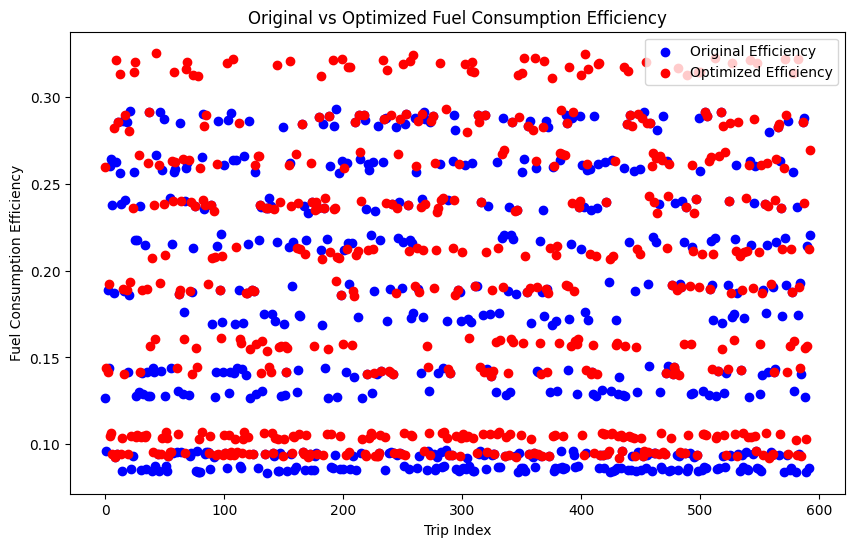

In [91]:
import matplotlib.pyplot as plt

# Generate a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Original_Fuel_Consumption_Efficiency'], label='Original Efficiency', color='blue')
plt.scatter(df.index, df['Optimized_Fuel_Consumption_Efficiency'], label='Optimized Efficiency', color='red')

# Add labels and title
plt.xlabel('Trip Index')
plt.ylabel('Fuel Consumption Efficiency')
plt.title('Original vs Optimized Fuel Consumption Efficiency')

# Add legend
plt.legend()

# Show the plot
plt.show()
